In [ ]:
#! git clone https://github.com/ARHashemi/particle_tracing_JAX.git

In [ ]:
#! cd particle_tracing_JAX
#!pip install -r requirements.txt

In [4]:
import vtk_velocity_reader as vtk_vr
import optimized_particle_advection as opa
import particle_visualizer as pvis
import numpy as np
import time

In [5]:
vtk_reader = vtk_vr.VTKVelocityReader("example_data/*_caseCoarse_*.pvtu")  # Adjust pattern as needed

try:
    velocity_data = vtk_reader.load_velocity_data()
    print(f"Loaded {len(vtk_reader.time_files)} time steps")
    print(f"Grid points: {velocity_data['points'].shape}")
    print(f"Velocity data shape: {velocity_data['velocity'].shape}")
except Exception as e:
    print(f"Error loading VTK data: {e}")
    print("Creating synthetic data for demonstration...")

    # Create synthetic data for demonstration
    n_points = 10000
    n_times = 2500
    grid_points = np.random.uniform(-1, 1, (n_points, 3))
    velocity_data_synthetic = np.random.uniform(-0.1, 0.1, (n_times, n_points, 3))
    time_steps = np.linspace(0, 1, n_times)

    velocity_data = {
        'points': grid_points,
        'velocity': velocity_data_synthetic,
        'times': time_steps
    }

Loading 2 VTK files...
  [ 1/2] 003_caseCoarse_158.pvtu   | Points:   6658 | Cells:  14723 (types: 10) | Bounds: [-0.0:0.1, -0.0:0.0, -0.0:0.0] | Field: 'Displacement'
  [ 2/2] 003_caseCoarse_159.pvtu   | Points:   6658 | Cells:  14723 (types: 10) | Bounds: [-0.0:0.1, -0.0:0.0, -0.0:0.0] | Field: 'Displacement'
Successfully loaded velocity data: 2 time steps, 6658 points, 3D velocity
Loaded 2 time steps
Grid points: (6658, 3)
Velocity data shape: (2, 6658, 3)


In [6]:
advection = opa.MemoryOptimizedJAXParticleAdvection(
    velocity_data['points'],
    velocity_data['velocity'],
    velocity_data['times'] [1],
    static_time_step=1  # Use a specific time step for static velocity
)

In [17]:
box_bounds = ((-0.025, -0.010), (-0.0198, 0.0198), (-0.008, 0.0))  # Adjust as needed
resolution = (10, 50, 20)  # Adjust density as needed

initial_positions = advection.create_particle_grid(box_bounds, resolution)
print(f"Created {initial_positions.shape[0]} particles")

# 4. Advect particles
print("\n4. Advecting particles...")
dt = 0.003  # Time stepfreeIrani@2025


n_steps = 4000 # Number of time steps to advect

start_time = time.time()
final_positions= advection.advect_particles_minimal_memory(initial_positions, dt, n_steps)#, trajectories , save_trajectory=True, initial_transient=20
end_time = time.time()

print(f"Advection completed in {end_time - start_time:.2f} seconds")
print(f"Trajectory shape: {final_positions.shape}")

Created 10000 particles

4. Advecting particles...
Step 100/4000
Step 200/4000
Step 300/4000
Step 400/4000
Step 500/4000
Step 600/4000
Step 700/4000
Step 800/4000
Step 900/4000
Step 1000/4000
Step 1100/4000
Step 1200/4000
Step 1300/4000
Step 1400/4000
Step 1500/4000
Step 1600/4000
Step 1700/4000
Step 1800/4000
Step 1900/4000
Step 2000/4000
Step 2100/4000
Step 2200/4000
Step 2300/4000
Step 2400/4000
Step 2500/4000
Step 2600/4000
Step 2700/4000
Step 2800/4000
Step 2900/4000
Step 3000/4000
Step 3100/4000
Step 3200/4000
Step 3300/4000
Step 3400/4000
Step 3500/4000
Step 3600/4000
Step 3700/4000
Step 3800/4000
Step 3900/4000
Step 4000/4000
Advection completed in 14.74 seconds
Trajectory shape: (10000, 3)


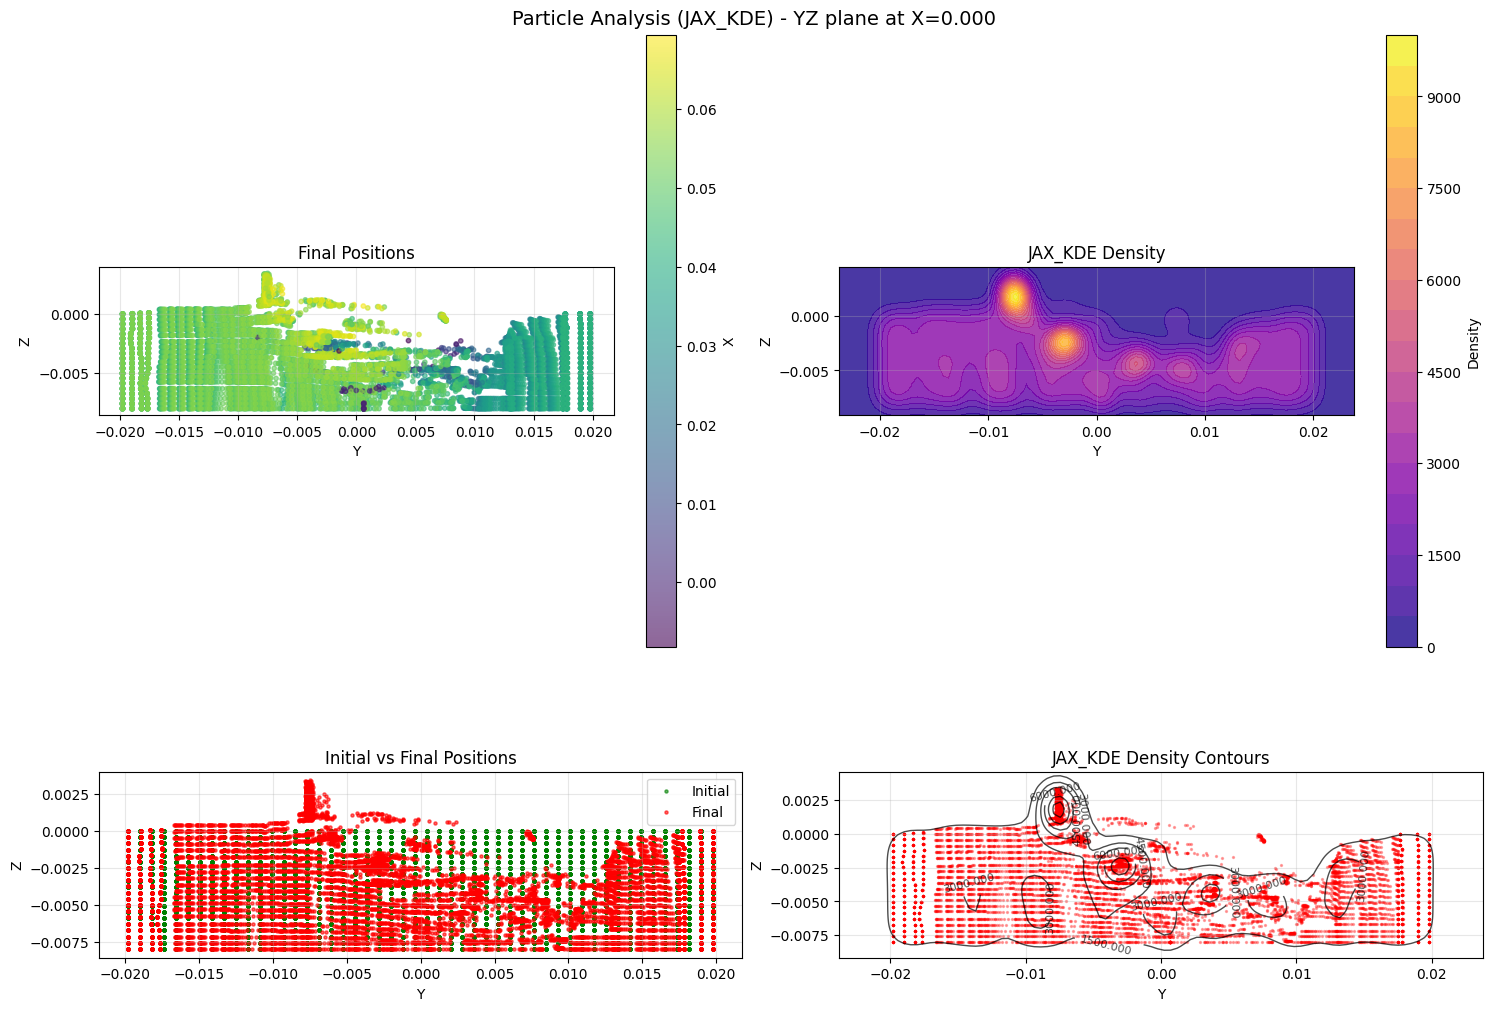

In [18]:
# pvis.quick_visualize_positions(final_pos, initial_positions, mode='analysis', plane='yz', save_path='particle_advection_analysis.png', slab_thickness=0.2, bandwidth=0.5)
viz = pvis.ParticlePositionVisualizer(final_positions=final_positions,
                                   initial_positions=initial_positions)
viz.plot_combined_analysis(
    method='jax_kde',
    bandwidth=0.001,
    slab_thickness=0.2,
    bandwidth_method='scott',
    plane='yz', save_path='particle_advection_kde_analysis_yz.png'
)

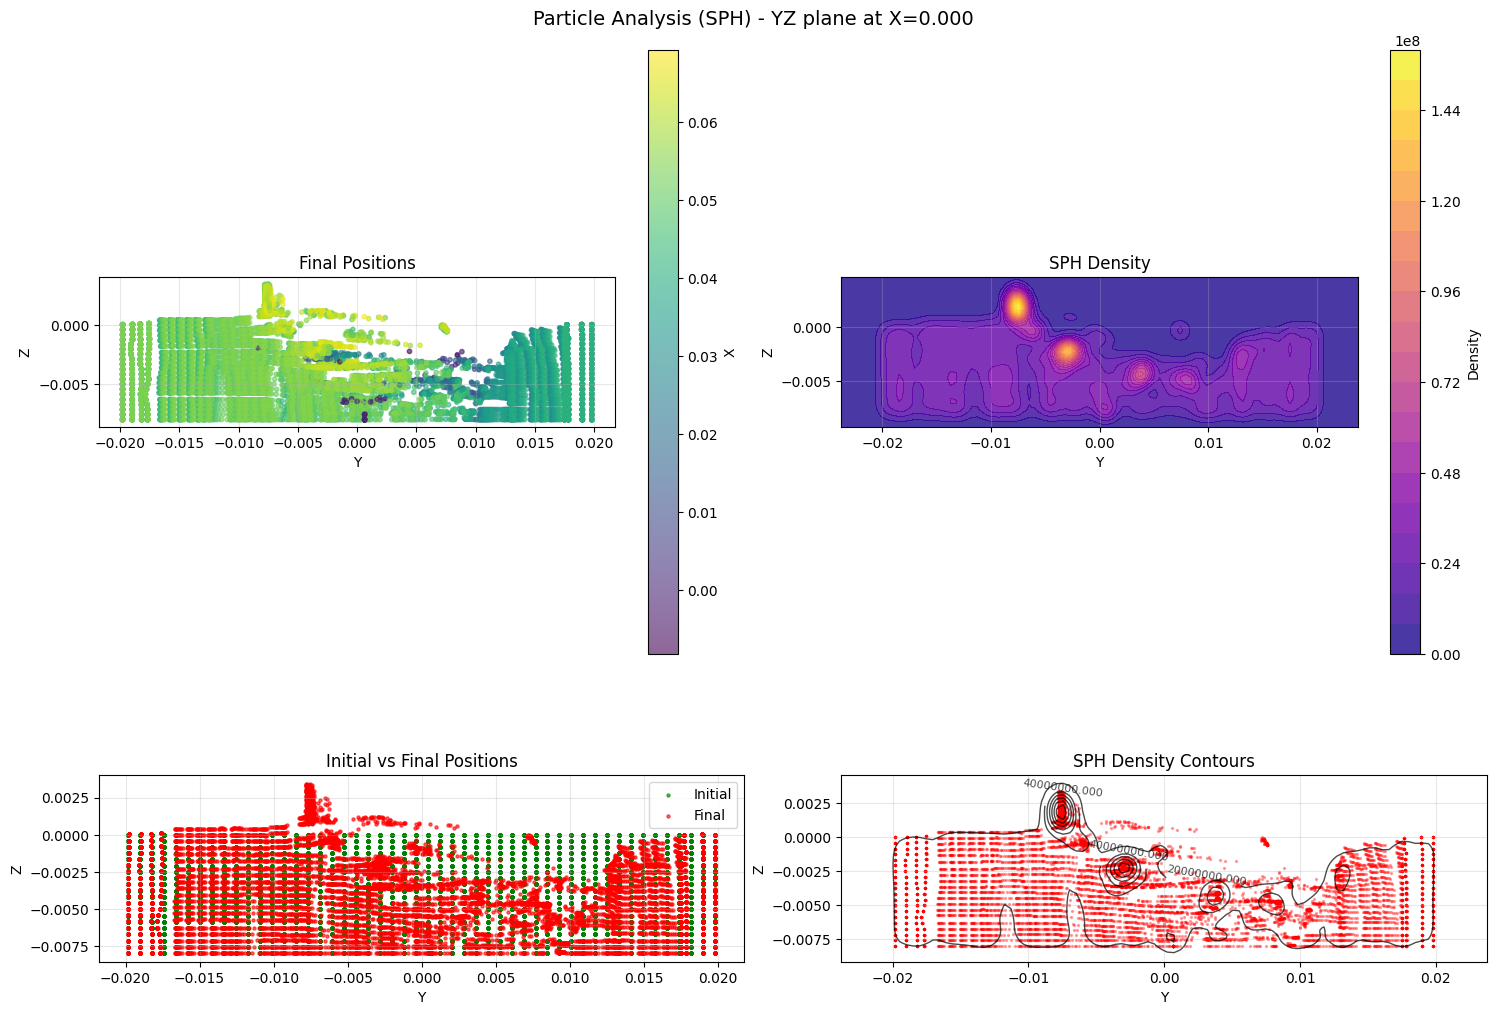

In [20]:
# SPH with adaptive smoothing
viz.plot_combined_analysis(
    method='sph',
    kernel_type='gaussian',#'cubic_spline',
    adaptive=True,
    n_neighbors=5,
    slab_thickness=0.2,
    smoothing_length=0.001,
    plane='yz',
    save_path='particle_advection_sph_analysis_yz.png'
)